In [1]:
import sys, os, glob, scipy, sqlite3, json, matplotlib#, pymer4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import matplotlib.ticker as mtick

In [2]:
# Style
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('seaborn-white')
sns.set_palette('tab10')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Helvetica"

### Load data

In [6]:
baseDir = os.path.realpath('../..')
print(baseDir)
sys.path.append('/'.join(os.path.realpath('..').split('/')[:4]) + '/Python')
import FigureTools

/Users/jeroen/Dropbox (Brown)/Postdoc FHL/JEROEN/SOC_STRUCT_LEARN/Code_share/NHB_motives_structure/Study1_MTurk


In [7]:
gameDat = pd.read_csv(baseDir+'/Data/Cleaned/gameDat.csv',index_col=0)
gameDat = gameDat.rename(columns = {'ConfidenceNum':'Confidence','ScoreNum':'Score'})
gameDat.head()

,sub,subID,Block,Player,Type,Variant,Type_Total,Trial,S,T,GameType,Colors,CorrAns,GivenAns,Confidence,Score,RT_radio,RT_submit,SelfReport
0,3,2003,0,G.P.,opt,nat,opt_nat,0,3,12,PD,"['Blue', 'Red']",def,def,70,1,10439,14310,maximize own score
1,3,2003,0,G.P.,opt,nat,opt_nat,1,7,8,HG,"['Blue', 'Red']",coop,coop,80,1,5259,8262,maximize own score
2,3,2003,0,G.P.,opt,nat,opt_nat,2,3,8,SH,"['Blue', 'Red']",coop,coop,80,1,2764,5519,maximize own score
3,3,2003,0,G.P.,opt,nat,opt_nat,3,7,12,SG,"['Blue', 'Red']",def,def,80,1,4497,7794,maximize own score
4,3,2003,0,G.P.,opt,nat,opt_nat,4,0,15,PD,"['Blue', 'Red']",def,def,70,1,12523,16207,maximize own score


In [8]:
print('%i participants found'%len(gameDat['subID'].unique()))

150 participants found


In [9]:
firstType = gameDat.loc[(gameDat['Trial']==0) & (gameDat['Block']==0), ['subID','Type_Total']].reset_index(drop=True)
firstType.columns = ['subID','FirstType']
thirdType = gameDat.loc[(gameDat['Trial']==0) & (gameDat['Block']==2), ['subID','Type_Total']].reset_index(drop=True)
thirdType.columns = ['subID','ThirdType']
gameDat = gameDat.merge(firstType,on='subID').merge(thirdType,on='subID')
gameDat.head()

,sub,subID,Block,Player,Type,Variant,Type_Total,Trial,S,T,...,Colors,CorrAns,GivenAns,Confidence,Score,RT_radio,RT_submit,SelfReport,FirstType,ThirdType
0,3,2003,0,G.P.,opt,nat,opt_nat,0,3,12,...,"['Blue', 'Red']",def,def,70,1,10439,14310,maximize own score,opt_nat,opt_inv
1,3,2003,0,G.P.,opt,nat,opt_nat,1,7,8,...,"['Blue', 'Red']",coop,coop,80,1,5259,8262,maximize own score,opt_nat,opt_inv
2,3,2003,0,G.P.,opt,nat,opt_nat,2,3,8,...,"['Blue', 'Red']",coop,coop,80,1,2764,5519,maximize own score,opt_nat,opt_inv
3,3,2003,0,G.P.,opt,nat,opt_nat,3,7,12,...,"['Blue', 'Red']",def,def,80,1,4497,7794,maximize own score,opt_nat,opt_inv
4,3,2003,0,G.P.,opt,nat,opt_nat,4,0,15,...,"['Blue', 'Red']",def,def,70,1,12523,16207,maximize own score,opt_nat,opt_inv


In [10]:
gtOrder = ['HG','SG','SH','PD']
roundOrder = range(4)
ptOrder = ['opt_nat','pess_nat','opt_inv','pess_inv']

##### Best score: subject 2133. What did they discover?

In [11]:
gameDat.loc[gameDat['subID']==2133,['Type_Total','SelfReport']].drop_duplicates()

,Type_Total,SelfReport
6208,pess_nat,safe and steady
6224,opt_nat,highest number
6240,opt_inv,the lowest one picked
6256,pess_inv,the lowest number in the 2nd box


## Overall performance by player type

In [12]:
gameDat.columns

Index(['sub', 'subID', 'Block', 'Player', 'Type', 'Variant', 'Type_Total',
       'Trial', 'S', 'T', 'GameType', 'Colors', 'CorrAns', 'GivenAns',
       'Confidence', 'Score', 'RT_radio', 'RT_submit', 'SelfReport',
       'FirstType', 'ThirdType'],
      dtype='object')

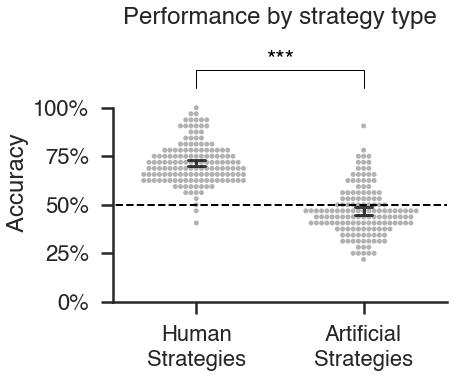

In [13]:
sns.set_context('poster')
blockDat = gameDat[['subID','Type_Total','Type','Variant','Confidence','Score']
                  ].groupby(['subID','Variant']).mean().reset_index()
fig, ax = plt.subplots(1,1,figsize=[6,5])
sns.barplot(data=blockDat,x='Variant',y='Score', ax=ax, errwidth = 3, capsize=.1,
            order=['nat','inv'],alpha=0)
sns.swarmplot(data=blockDat,x='Variant',y='Score', ax=ax,
            order=['nat','inv'], alpha=.3, color = 'k')
ax.plot([-5,5],[.5,.5], 'k--', lw=2)
ax.set(ylim = [0,1.1], xlim = [-.5,1.5], xlabel = None, yticks = [0,.25,.5,.75,1],
       title = 'Performance by strategy type',
       xticklabels = ['Human\nStrategies', 'Artificial\nStrategies'], ylabel = 'Accuracy     ');
dat1 = blockDat.loc[blockDat['Variant']=='nat','Score'].values
dat2 = blockDat.loc[blockDat['Variant']=='inv','Score'].values
stats = scipy.stats.ttest_rel(dat2,dat1)
FigureTools.add_sig_markers(ax, relationships=[[0,1,stats[1]]])
sns.despine(top=True,right=True)
ax.spines['left'].set_bounds(0,1)
ax.set_ylim([0,1.4])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
# plt.savefig(baseDir+'/Figures/plot1b.pdf',transparent=True, bbox_inches='tight');

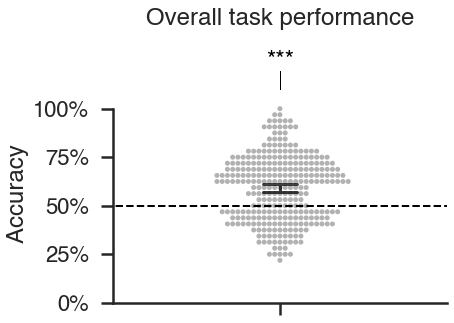

In [14]:
sns.set_context('poster')
overallDat = gameDat[['subID','Type_Total','Type','Variant','Confidence','Score']
                  ].groupby(['subID']).mean().reset_index()
fig, ax = plt.subplots(1,1,figsize=[6,5])
sns.barplot(data=blockDat,y='Score', ax=ax, errwidth = 3, capsize=.1,
            alpha=0)
sns.swarmplot(data=blockDat,y='Score', ax=ax,
            alpha=.3, color = 'k')
ax.plot([-5,5],[.5,.5], 'k--', lw=2)
ax.set(ylim = [0,1.1], xlabel = None, yticks = [0,.25,.5,.75,1],
       title = 'Overall task performance',
       ylabel = 'Accuracy        ');
stats = scipy.stats.ttest_1samp(overallDat['Score'].values, 0.5)
FigureTools.add_sig_markers(ax, relationships=[[0,0,stats[1]]])
sns.despine(top=True,right=True)
ax.spines['left'].set_bounds(0,1)
ax.set_ylim([0,1.4])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
# plt.savefig(baseDir+'/Figures/plot1d.pdf',transparent=True, bbox_inches='tight');

In [15]:
def ttest_1samp(dat, popmean = .5, verbose = True):
    if verbose:
        print('SD: ',np.std(dat))
        print('Stats:')
    stats = scipy.stats.ttest_1samp(dat, popmean = popmean)
    if verbose:
        print(stats)
        print('Cohen d:')
    coh_d = (np.mean(dat) - popmean)/np.std(dat)
    if verbose:
        print(coh_d)
    return(stats, coh_d)

In [16]:
def ttest_2samp(dat1, dat2):
    print('SD dat 1: ',np.std(dat1))
    print('SD dat 2: ',np.std(dat2))
    print('Stats:')
    stats = scipy.stats.ttest_ind(dat1, dat2)
    print(stats)
    print('Cohen d:')
    nx = len(dat1)
    ny = len(dat2)
    dof = nx + ny - 2
    coh_d = ((np.mean(dat1) - np.mean(dat2)) /
             np.sqrt(((nx-1)*np.std(dat1, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof))
    print(coh_d)
    return(stats, coh_d)

In [17]:
ttest_1samp(overallDat['Score'].values);

SD:  0.09116910417216764
Stats:
Ttest_1sampResult(statistic=12.16159953707538, pvalue=4.523880875355806e-24)
Cohen d:
0.9963170545341739


In [15]:
scipy.stats.wilcoxon(overallDat['Score'].values-0.5)

WilcoxonResult(statistic=400.0, pvalue=6.322009469523281e-22)

##### Plot model reproduction of this effect

In [20]:
sim_dat = pd.read_csv(baseDir + '/Data/Cleaned/Model_simulations_%s_%s.csv'%('CoGrRiNa','best'), index_col=0)
sim_dat.head()

,sub,subID,Trial,Variant,Type_Total,CorrAns,GivenAns,Confidence,sub_score,model_pred_coop,model_pred,model_score
0,3,2003,0,nat,opt_nat,def,def,70,1,0.424167,def,1
1,3,2003,1,nat,opt_nat,coop,coop,80,1,0.833934,coop,1
2,3,2003,2,nat,opt_nat,coop,coop,80,1,0.846740,coop,1
3,3,2003,3,nat,opt_nat,def,def,80,1,0.365957,def,1
4,3,2003,4,nat,opt_nat,def,def,70,1,0.318638,def,1


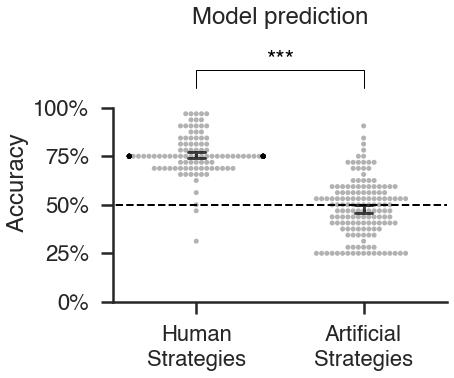

In [21]:
sns.set_context('poster')
sim_block_dat = sim_dat[['subID','Type_Total','Variant','Confidence','model_score']
                  ].groupby(['subID','Variant']).mean().reset_index()
fig, ax = plt.subplots(1,1,figsize=[6,5])
sns.barplot(data=sim_block_dat,x='Variant',y='model_score', ax=ax, errwidth = 3, capsize=.1,
            order=['nat','inv'],alpha=0)
sns.swarmplot(data=sim_block_dat,x='Variant',y='model_score', ax=ax,
            order=['nat','inv'], alpha=.3, color = 'k')
ax.plot([-5,5],[.5,.5], 'k--', lw=2)
ax.set(ylim = [0,1.1], xlim = [-.5,1.5], xlabel = None, yticks = [0,.25,.5,.75,1],
       title = 'Model prediction',
       xticklabels = ['Human\nStrategies', 'Artificial\nStrategies'], ylabel = 'Accuracy     ');
dat1 = sim_block_dat.loc[sim_block_dat['Variant']=='nat','model_score'].values
dat2 = sim_block_dat.loc[sim_block_dat['Variant']=='inv','model_score'].values
stats = scipy.stats.ttest_rel(dat2,dat1)
FigureTools.add_sig_markers(ax, relationships=[[0,1,stats[1]]])
sns.despine(top=True,right=True)
ax.spines['left'].set_bounds(0,1)
ax.set_ylim([0,1.4])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
# plt.savefig(baseDir+'/Figures/plot1c.pdf',transparent=True, bbox_inches='tight');

##### Mean performance, compare distribution of mean per subject against 50%

In [22]:
gameDat['Score'].describe()

count    9600.000000
mean        0.590833
std         0.491706
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Score, dtype: float64

In [23]:
meanPerSub = gameDat.groupby('subID').mean()['Score'].values
print(len(meanPerSub))
scipy.stats.ttest_1samp(meanPerSub, .5)

150


Ttest_1sampResult(statistic=12.16159953707538, pvalue=4.523880875355806e-24)

##### Compare human vs artificial strategy performance using within subjects t-test

In [24]:
stats

Ttest_relResult(statistic=-23.893638317826607, pvalue=7.935219387016067e-53)

In [25]:
meanPerSubCondition = gameDat.groupby(['subID','Variant'],as_index=False).mean()[['subID','Variant','Score']].pivot(
    index='subID',columns = 'Variant', values = 'Score')
meanPerSubCondition.head()

Variant,inv,nat
subID,,
2003,0.46875,0.78125
2004,0.37500,0.62500
2005,0.40625,0.65625
2006,0.40625,0.71875
2008,0.50000,0.68750


Within natural

In [26]:
meanPerSubCondition['nat'].describe()

count    150.000000
mean       0.716250
std        0.105402
min        0.406250
25%        0.656250
50%        0.703125
75%        0.781250
max        1.000000
Name: nat, dtype: float64

In [27]:
scipy.stats.ttest_1samp(meanPerSubCondition['nat'], .5)

Ttest_1sampResult(statistic=25.127824060290394, pvalue=1.924759029222467e-55)

Within artificial

In [28]:
meanPerSubCondition['inv'].describe()

count    150.000000
mean       0.465417
std        0.124166
min        0.218750
25%        0.382812
50%        0.437500
75%        0.531250
max        0.906250
Name: inv, dtype: float64

In [29]:
scipy.stats.ttest_1samp(meanPerSubCondition['inv'], .5)

Ttest_1sampResult(statistic=-3.4112209783787257, pvalue=0.0008326077881688598)

Between natural and artificial

In [30]:
scipy.stats.ttest_rel(meanPerSubCondition['inv'],meanPerSubCondition['nat'])

Ttest_relResult(statistic=-21.95287714517171, pvalue=1.4999341663439538e-48)

In [31]:
ttest_1samp((meanPerSubCondition['nat']-meanPerSubCondition['inv']), popmean = 0)

SD:  0.1394719705014436
Stats:
Ttest_1sampResult(statistic=21.95287714517171, pvalue=1.4999341663439538e-48)
Cohen d:
1.798449770455757


(Ttest_1sampResult(statistic=21.95287714517171, pvalue=1.4999341663439538e-48),
 1.798449770455757)